## Proyecto Final del Curso Fundamentos Matemáticos del procesamiento de señales.


Importamos las librerias necesarias a utilizar.

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.io import wavfile
import math
import pylab as pl
from scipy import interpolate
np.set_printoptions(precision=2,suppress=True)

Procedemos a importar las señales correspondientes a la octava central de un piano, todas tocadas de manera regular y en un mismo tiempo. Para esto definiremos algunas funciones que nos serán de utilidad

In [2]:
def CARGAR(path):
    fs,x=wavfile.read(path)
    k=2000
    x = np.mean(x, axis=1) #hacemos el audio mono.
    
    pl.figure(figsize=(12,4))
    t=np.arange(0,len(x)/fs,1/fs)
    pl.plot(t[:k],x[:k], label=f'$x[n]$ entre $t=0$ y ${k/fs}$ segundos, con sampling rate de $f_s={fs}$ Hz')
    pl.legend()
    pl.xlabel('tiempo[s]')
    pl.ylabel('amplitud señal')
    return fs,x

In [3]:
def FFT(x):
    n=len(x)
    xhat=np.fft.fft(x)
    freq=np.fft.fftfreq(n,-1)
    
    pl.figure(figsize=(12,4))
    pl.plot(freq,xhat.real, 'r-')
    pl.xlabel('Frecuencia [hz]')
    pl.ylabel('Amplitud TFD')
    return xhat,freq

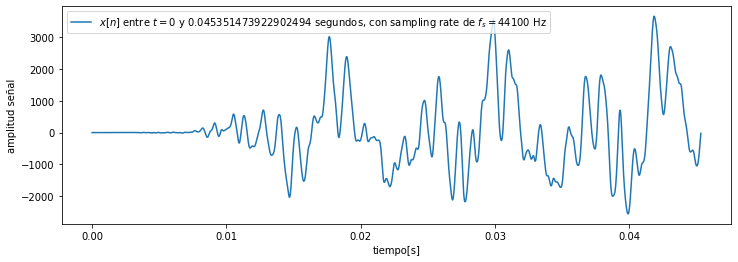

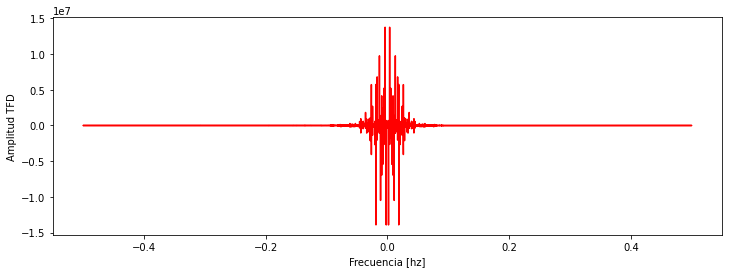

In [4]:
fs40,x40=CARGAR('escalaC4/40(C4).wav')
xhat40,freq40 = FFT(x40)

# Estimación

Definimos el Power Spectrum accumulated, para esto definiremos una cantidad creciente de 
tiempos $n_i$ tales que
$n_1=7000$, $n_2=14000$, $\dots$, $n_{63}=441000$.

In [5]:
import math
def p(x,f,i):
    ni=7000*i
    Pi=[]
    window=np.hamming(7000)
    for k in range(0,7000):
        Pi.append(x[k+ni]*window[k]*np.exp(-1j*2*np.pi*k*f/7000))
    sumi=sum(Pi)
    return sumi

def pcum(x,f,i):
    accum=[]
    for j in range(0,63-i):
        jaux=62-j
        accum.append(abs(p(x,f,jaux))**2)
    pc=sum(accum)
    return math.log(pc)
    

In [8]:
min(freq40), max(freq40)

(-0.49999773242630385, 0.5)

Calculemos el Pcum para un recorrido de señales entre las encontradas en las FFT

In [27]:
f=np.arange(min(freq40), max(freq40), 100/fs40)
len(f)

441

662.9529445171356


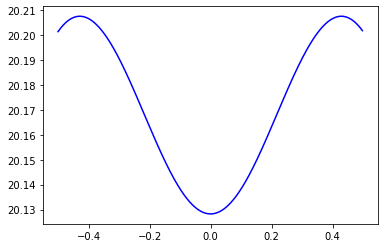

In [29]:
import time
start=time.time()
f=np.arange(min(freq40), max(freq40), 100/fs40)
pf1=[]
for j in f:
    pf1.append(pcum(x40,j,1))
end=time.time()
print(end-start)

Text(0, 0.5, 'Power spectrum cumultad para i=1')

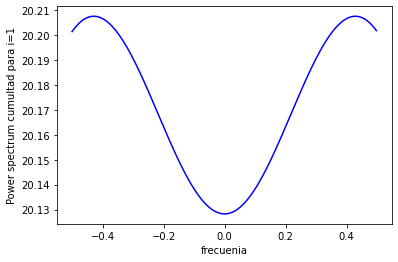

In [43]:
plt.figure()
plt.plot(f,pf1,'b-')
plt.xlabel('frecuenia')
plt.ylabel('Power spectrum cumultad para i=1')

Calculamos sus componentes sinusoidales

In [48]:
A=(max(pf1)-min(pf1))/2  #amplitud
L=(max(freq40)-min(freq40)) #longitud de onda
fre=1/L
print('la amplitud es de ', A ,' y la frecuencia es de' ,fre)

la amplitud es de  0.03971076038258303  y la frecuencia es de 1.000002267578838


Ahora para calcular los factores de amortiguamiento, en el 3D power spectrum debemos calcular la pendiente para el caso cuando $f$ es constante e $i$ varía, es decir utilizando una frecuencia fija de $f=0.5$

Creamos una lista con todos los valores del espectro.

In [15]:
damp=[]
f=0.5
for i in range(0,62):
    damp.append(pcum(x40,f,i))

Interpolamos

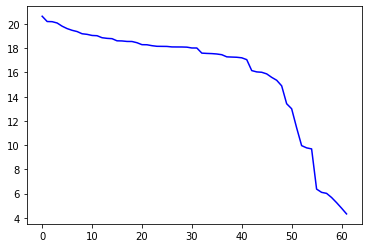

In [16]:
x = np.arange(0, 62, 1)

plt.figure()
plt.plot(x,damp,'b-')


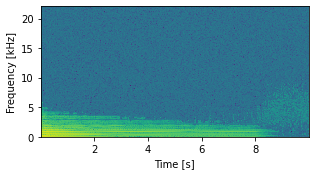

In [18]:
from scipy import signal

freqs, times, Sx = signal.spectrogram(x40, fs=fs40, window='hanning',
                                      nperseg=1024,
                                      detrend=False, scaling='spectrum')

f, ax = plt.subplots(figsize=(4.8, 2.4))
ax.pcolormesh(times, freqs / 1000, 10 * np.log10(Sx), cmap='viridis')
ax.set_ylabel('Frequency [kHz]')
ax.set_xlabel('Time [s]');

Con esto obtuvimos las frecuencias $f_i$ y utilizando el hecho de que
$$
f_i=\dfrac{F_s}{2 \pi} arg(z_i),
$$
Así obtenemos que
$$
arg(z_i)=\dfrac{f_i 2 \pi}{F_s}
$$

In [19]:
args=[]
for i in range(0,len(freqs)):
    args.append(freqs[i]*2*np.pi/fs40)